# Домашнее задание 6: классификация текстов

В этом домашнем задании вам предстоит построить классификатор текстов!

Данные мы будем использовать из Kaggle соревнования: https://www.kaggle.com/competitions/nlp-getting-started/data Оттуда надо скачать файл train.csv. На обучающую и тестовую выборки его поделим кодом ниже, менять его не надо!

Мы будем работать с датасетом постов из твиттера. Нам предстоит решать задачу бинарной классификации - определять содержатся ли в твитте информация о настоящей катастрофе/инциденте или нет.

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3, random_state=42)

## Задание 1 (0.5 балла)

Выведете на экран информацию о пропусках в данных. Если пропуски присутствуют заполните их пустой строкой.

In [ ]:
train.isnull().any()

id          False
keyword      True
location     True
text        False
target      False
dtype: bool

In [ ]:
train.fillna(' ', inplace=True)

In [ ]:
test.fillna(' ', inplace=True)

## Задание 2 (1 балл)
Давайте немного посмотрим на наши данные. Визуализируйте (где явно просят) или выведете информацию о следующем:

1. Какое распределение классов в обучающей выборке?
2. Посмотрите на колонку "keyword" - возьмите 10 наиболее встречающихся значений, постройте ступенчатую диаграмму распределения классов в зависимости от значения keyword, сделайте выводы.

1. В -1 классе 3024 объекта, в +1 2305 - почти равномерное

In [ ]:
train.groupby(['target']).count()

,id,keyword,location,text
target,,,,
0,3024,3024,3024,3024
1,2305,2305,2305,2305


2.1 10 наиболее встречающихся значений keyword

In [ ]:
most_popular_keywords = train.keyword.value_counts().reset_index().head(11).iloc[1:10, :]['index'].to_list()
most_popular_keywords

['damage',
 'siren',
 'wreckage',
 'fatalities',
 'deluge',
 'refugees',
 'derail',
 'fear',
 'tsunami']

In [ ]:
train_with_most_popular_keywords = train.loc[train['keyword'].isin(most_popular_keywords)]

2.2 ступенчатая диаграмма распределения классов от ключевых слов

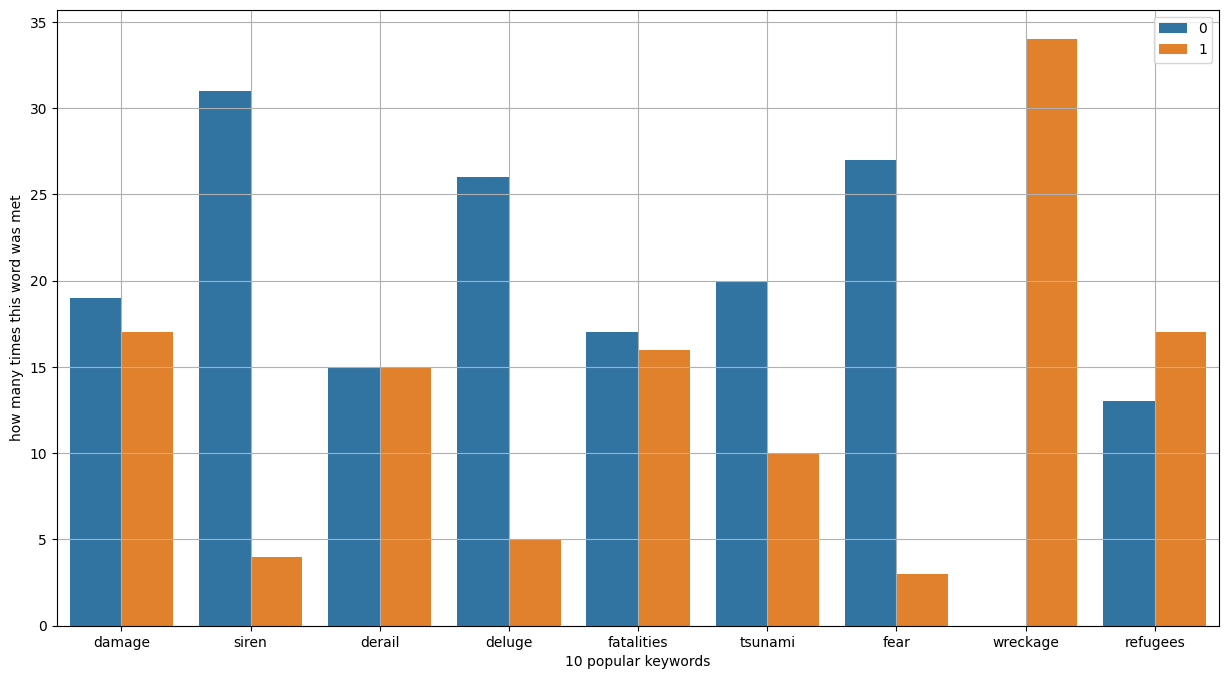

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sns.countplot(x = 'keyword', hue='target' , data = train_with_most_popular_keywords)
plt.xlabel('10 popular keywords')
plt.ylabel('how many times this word was met')
plt.legend()
plt.grid()
plt.show()

Самое популярное слово (wreckage) может быть индикатором, который показывает является ли данный пост сообщением о катастрофе или нет(все твиты, где оно было, относятся к классу +1). По данной диаграмме можно сделать вывод, что очень важен контекст в данных текстах(поэтому при обучени придется использовать какой-то неединичной размерности n-граммы), потому что, например, для слова fear большая часть твитов не являются сообщениями о катастрофе, и это невозможно сказать без контекста(I feel fear I won't pass my exam/ I feel fear there was a car accident near me a few minutes ago)

## Задание 3 (0.5 балла)

В этом задании предлагается объединить все три текстовых столбца в один (просто сконкатенировать cтроки) и убрать столбец с индексом.

In [ ]:
y_train = train['target']

In [ ]:
y_test = test['target']

In [ ]:
train = train.drop(['id','target'], axis=1)

In [ ]:
test = test.drop(['id','target'], axis=1)

In [ ]:
train = train.agg(' '. join , axis= 1)

In [ ]:
test = test.agg(' '. join , axis= 1)

In [ ]:
train

1186    bridge%20collapse   Ashes 2015: AustraliaÛªs ...
4071    hail Carol Stream, Illinois GREAT MICHIGAN TEC...
5461    police Houston  CNN: Tennessee movie theater s...
5787    rioting   Still rioting in a couple of hours l...
7445    wounds Lake Highlands Crack in the path where ...
                              ...                        
5226    obliteration Merica! @Eganator2000 There aren'...
5390    panic   just had a panic attack bc I don't hav...
860     blood   Omron HEM-712C Automatic Blood Pressur...
7603        Officials say a quarantine is in place at ...
7270    whirlwind Stamford & Cork (& Shropshire) I mov...
Length: 5329, dtype: object

In [ ]:
test

2644    destruction   So you have a new weapon that ca...
2227    deluge   The f$&amp;@ing things I do for #GISH...
5448    police UK DT @georgegalloway: RT @Galloway4May...
132     aftershock   Aftershock back to school kick of...
6845    trauma Montgomery County, MD in response to tr...
                              ...                        
4307    hellfire 570 Vanderbilt; Brooklyn, NY New cock...
3375    evacuation USA Bend Post Office roofers cut ga...
1710    collided   Monsoon flooding - Monsoon rains ha...
4898    massacre Ireland Remember this was a massacre ...
6753    tornado Asheville, NC I liked a @YouTube video...
Length: 2284, dtype: object

## Задание 4 (0.5 балла)

Далее мы будем пока работать только с train частью.

1. Предобработайте данные (train часть) с помощью CountVectorizer.
2. Какого размера получилась матрица?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

cnt_vec = CountVectorizer()
X_train = cnt_vec.fit_transform(train)
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

## Задание 5 (1 балл)

В предыдущем пункте у вас должна была получиться достаточно большая матрица.
Если вы взгляните на текст, то увидете, что там есть множество специальных символов, ссылок и прочего мусора.

Давайте также посмотрим на словарь, который получился в результате построения CountVectorizer, его можно найти в поле vocabulary_ инстанса этого класса. Давайте напишем функцию, которая печает ответы на следующие вопросы:

1. Найдите в этом словаре все слова, которые содержат цифры. Сколько таких слов нашлось?

2. Найдите все слова, которые содержат символы пунктуации. Сколько таких слов нашлось?

3. Сколько хэштегов (токен начинается на #) и упоминаний (токен начинается на @) осталось в словаре?

In [ ]:
import re

In [ ]:
def symbols_in_dict(vocabulary):
    amount_1 = 0
    amount_2 = len(vocabulary)
    amount_3 = 0
    amount_4 = 0
    for feature in vocabulary.keys():
        match_1 = re.search('\d+', str(feature))
        match_2 = re.match(r'^[A-Za-z0-9]+$', str(feature))
        match_3 = re.match(r'^#[A-Za-z0-9]+$', str(feature))
        match_4 = re.match(r'^@[A-Za-z0-9]+$', str(feature))
        if match_1:
            amount_1 += 1
        if match_2:
            amount_2 = amount_2 -  1
        if match_3:
            amount_3 += 1
        if match_4:
            amount_4 += 1
    print (f'Содержат цифры {amount_1}.')
    print (f'Содержат знаки препинания {amount_2}.')
    print (f'Содержат хештеги {amount_3}.')
    print (f'Содержат упоминания {amount_4}.')


symbols_in_dict(cnt_vec.vocabulary_)

Содержат цифры 3812.
Содержат знаки препинания 433.
Содержат хештеги 0.
Содержат упоминания 0.


## Задание 6 (0.5 балла)

Вспомним, что на семинаре по текстам мы узнали, что в nltk есть специальный токенизатор для текстов - TweetTokenizer. Попробуем применить CountVectorizer с этим токенизатором. Ответьте на все вопросы из предыдущего пункта для TweetTokenizer и сравните результаты.

In [ ]:
from nltk.tokenize import TweetTokenizer
# Чтобы узнать, какие параметры есть у этого токенайзера - используйте help(TweetTokenizer)
# Для того, чтобы передать токенайзер в CountVectorizer используйте параметр tokenizer
tw = TweetTokenizer()
cnt_vec = CountVectorizer(tokenizer = tw.tokenize)
X_train = cnt_vec.fit_transform(train)
X_train.toarray()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [ ]:
symbols_in_dict(cnt_vec.vocabulary_)

Содержат цифры 3939.
Содержат знаки препинания 7466.
Содержат хештеги 1444.
Содержат упоминания 1413.


In [ ]:
cnt_vec.vocabulary_


{'bridge': 5275,
 '%': 1472,
 '20collapse': 1800,
 'ashes': 4530,
 '2015': 1773,
 ':': 2229,
 'australia': 4628,
 '\x89': 19587,
 'ûªs': 19640,
 'collapse': 6032,
 'at': 4567,
 'trent': 18450,
 'among': 4300,
 'worst': 19368,
 'in': 12552,
 'history': 8949,
 'england': 7415,
 'bundled': 5388,
 'out': 14999,
 'for': 8041,
 '60': 2077,
 '...': 1512,
 'http://t.co/t5trhjuau0': 11456,
 'hail': 8661,
 'carol': 5600,
 'stream': 17648,
 ',': 1483,
 'illinois': 12503,
 'great': 8518,
 'michigan': 14071,
 'technique': 18025,
 'camp': 5510,
 'b1g': 4691,
 'thanks': 18124,
 'to': 18284,
 '@bmurph1019': 2490,
 '@hail_youtsey': 2905,
 '.': 1509,
 '@termn8r13': 3718,
 '#goblue': 520,
 '#wrestleon': 1442,
 'http://t.co/oaskgki6qj': 10996,
 'police': 15494,
 'houston': 9082,
 'cnn': 5982,
 'tennessee': 18063,
 'movie': 14348,
 'theater': 18131,
 'shooting': 17007,
 'suspect': 17851,
 'killed': 13124,
 'by': 5442,
 'http://t.co/di8elzswnr': 9897,
 'rioting': 16377,
 'still': 17597,
 'a': 3943,
 'couple

ТвитТокенайзер скорее всего уделяет больше внимания словам со знакам препинания( в нашем случае, @, #), поэтому теперь они содержатся в словаре

## Задание 7 (2 балла)

В scikit-learn мы можем оценивать процесс подсчета матрицы через CountVectorizer. У CountVectorizer, как и у других наследников \_VectorizerMixin, есть аргумент tokenizer и preprocessor. preprocessor применится в самом начале к каждой строке вашего датасета, tokenizer же должен принять строку и вернуть токены.
Давайте напишем кастомный токенайзер, которые сделает все, что нам нужно:

0. Приведет все буквы к нижнему регистру
1. Разобьет текст на токены с помощью TweetTokenizer из пакета nltk
2. Удалит все токены содержащие не латинские буквы, кроме смайликов (будем считать ими токены содержащие только пунктуацию и, как минимум, одну скобочку) и хэштегов, которые после начальной # содержат только латинские буквы.
3. Удалит все токены, которые перечислены в nltk.corpus.stopwords.words('english')
4. Проведет стемминг с помощью SnowballStemmer

Продемонстрируйте работу вашей функции на первых десяти текстах в обучающей выборке.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.tokenize import TweetTokenizer
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer


def custom_tokenizer(tweet_text):

    tokenized_words = []

    tw = TweetTokenizer()
    stemmer = SnowballStemmer('english')

    tweet_text = tweet_text.lower()
    tweet_text = tw.tokenize(tweet_text)

    for word in tweet_text:
      if re.fullmatch(r'[a-z]+|^#[a-z]+$|' + f'[{punctuation}]+' + '[()]+', word) and (word not in stopwords.words('english')):
        tokenized_words.append(word)
      stemmed = [stemmer.stem(w) for w in tokenized_words]
    return stemmed


In [ ]:
print(custom_tokenizer(train.head(10).to_string()))


['bridg', 'ash', 'australia', 'hail', 'carol', 'stream', 'illinoi', 'great', 'michigan', 'tec', 'polic', 'houston', 'cnn', 'tennesse', 'movi', 'theater', 'riot', 'still', 'riot', 'coupl', 'hour', 'l', 'wound', 'lake', 'highland', 'crack', 'path', 'airplan', 'somewher', 'expert', 'bloodi', 'isol', 'citi', 'world', 'perth', 'came', 'burn', 'except', 'idk', 'destroy', 'ask', 'destroy', 'hous', 'wound', 'maracay', 'nirgua', 'venezuela', 'polic']


## Задание 8 (1 балл)

1. Примените CountVectorizer с реализованным выше токенизатором к обучающим и тестовым выборкам.
2. Обучите LogisticRegression на полученных признаках.
3. Посчитайте метрику f1-score на тестовых данных.

In [ ]:
cnt_vec = CountVectorizer(tokenizer = custom_tokenizer)
X_train = cnt_vec.fit_transform(train)
X_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
X_test = cnt_vec.transform(test)
X_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(X_train, y_train)
pred_y = clf.predict(X_test)
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1318
           1       0.78      0.72      0.75       966

    accuracy                           0.80      2284
   macro avg       0.80      0.79      0.79      2284
weighted avg       0.80      0.80      0.80      2284



f1 мера: для положительного класса 0.75, для отрицательного 0.83

## Задание 9 (1 балл)

1. Повторите 7 задание, но с tf-idf векторизатором. Как изменилось качество?
2. Мы можем еще сильнее уменьшить размер нашей матрицы, если отбросим значения df близкие к единице. Скорее всего такие слова не несут много информации о категории, так как встречаются достаточно часто. Ограничьте максимальный df в параметрах TfIdfVectorizer, поставьте верхнюю границу равную 0.9. Как изменился размер матрицы, как изменилось качество?
3. Также мы можем уменьшить размер матрицы, удаляя слова со слишком маленьким df. Удалось ли добиться улучшения качества?

In [ ]:
from sklearn.preprocessing import MaxAbsScaler
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(tokenizer = custom_tokenizer)
vec_train = vec.fit_transform(train)
vec_test = vec.transform(test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

vec_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 10477)

In [ ]:
clf = LogisticRegression(max_iter=100, random_state=42)
clf.fit(vec_train, y_train)
pred = clf.predict(vec_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.80      0.79      2284



Не изменилось(

In [ ]:
vec = TfidfVectorizer(max_df = 0.9, tokenizer = custom_tokenizer)
vec_train = vec.fit_transform(train)
vec_test = vec.transform(test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

vec_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 10477)

In [ ]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred = clf.predict(vec_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.79      0.71      0.75       966

    accuracy                           0.80      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.80      0.79      2284



2. Не изменилось :(

In [ ]:
vec = TfidfVectorizer(max_df=0.7, min_df=0.001, tokenizer=custom_tokenizer)
vec_train = vec.fit_transform(train)
vec_test = vec.transform(test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

vec_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 1737)

In [ ]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred = clf.predict(vec_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83      1318
           1       0.78      0.71      0.75       966

    accuracy                           0.79      2284
   macro avg       0.79      0.78      0.79      2284
weighted avg       0.79      0.79      0.79      2284



## Задание 10 (1 балл)

Еще один популяпный трюк, который позволит уменьшить количество признаков называется hashing trick. Его суть в том, то мы случайно группируем признаки ииии  ..... складываем их! А потом удаляем исходные признаки. В итоге все наши признаки это просто суммы исходных. Звучит странно, но это отлично работает. Давайте проверим этот трюк в нашем сеттинге.
Также при таком подходе вам не нужно хранить словарь token->index, что тоже иногда полезно.

1. Повторите задание 7 с HashingVectorizer, укажите количество фичей равное 5000.
2. Какой из подходов показал самый высокий результат?

In [ ]:
from sklearn.feature_extraction.text import HashingVectorizer

vec = HashingVectorizer(tokenizer=custom_tokenizer, n_features=5000)
vec_train = vec.fit_transform(train)
vec_test = vec.transform(test)


scaler = MaxAbsScaler()
vec_train = scaler.fit_transform(vec_train)
vec_test = scaler.transform(vec_test)

vec_train.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(5329, 5000)

In [ ]:
clf = LogisticRegression(max_iter=300, random_state=42)
clf.fit(vec_train, y_train)
pred = clf.predict(vec_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82      1318
           1       0.77      0.70      0.73       966

    accuracy                           0.78      2284
   macro avg       0.78      0.77      0.78      2284
weighted avg       0.78      0.78      0.78      2284



## Задание 11 (1 балл)

В этом задании нужно добиться f1 меры хотя в 0.75 на тестовых данных.